In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [11]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDims/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file and "MSEs" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0).dropna()
    print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

              bw          mse
0       0.000282  3149.572998
1       0.000372  3149.572998
2       0.000491  3149.572510
3       0.000649  3149.565430
4       0.000857  3149.525879
5       0.001131  3149.372070
6       0.001493  3149.193848
7       0.001972  3148.832764
8       0.002603  3148.277100
9       0.003437  3147.470703
10      0.004538  3146.031250
11      0.005992  3143.633057
12      0.007912  3139.590332
13      0.010446  3132.410645
14      0.013793  3119.187012
15      0.018211  3095.547119
16      0.024046  3055.306885
17      0.031749  2987.876953
18      0.041919  2878.968994
19      0.055348  2705.846924
20      0.073079  2430.940430
21      0.096490  2011.316284
22      0.127401  1437.386108
23      0.168214   809.178162
24      0.222102   330.101746
25      0.293252   100.200188
26      0.387196    27.444902
27      0.511235    12.838132
28      0.675010    12.959937
29      0.891251    14.928529
30      1.135011    16.145746
31      1.445440    16.871471
32      1.

Text(0.5, 1.0, 'Minimum MSE is (12.838132, 27)')

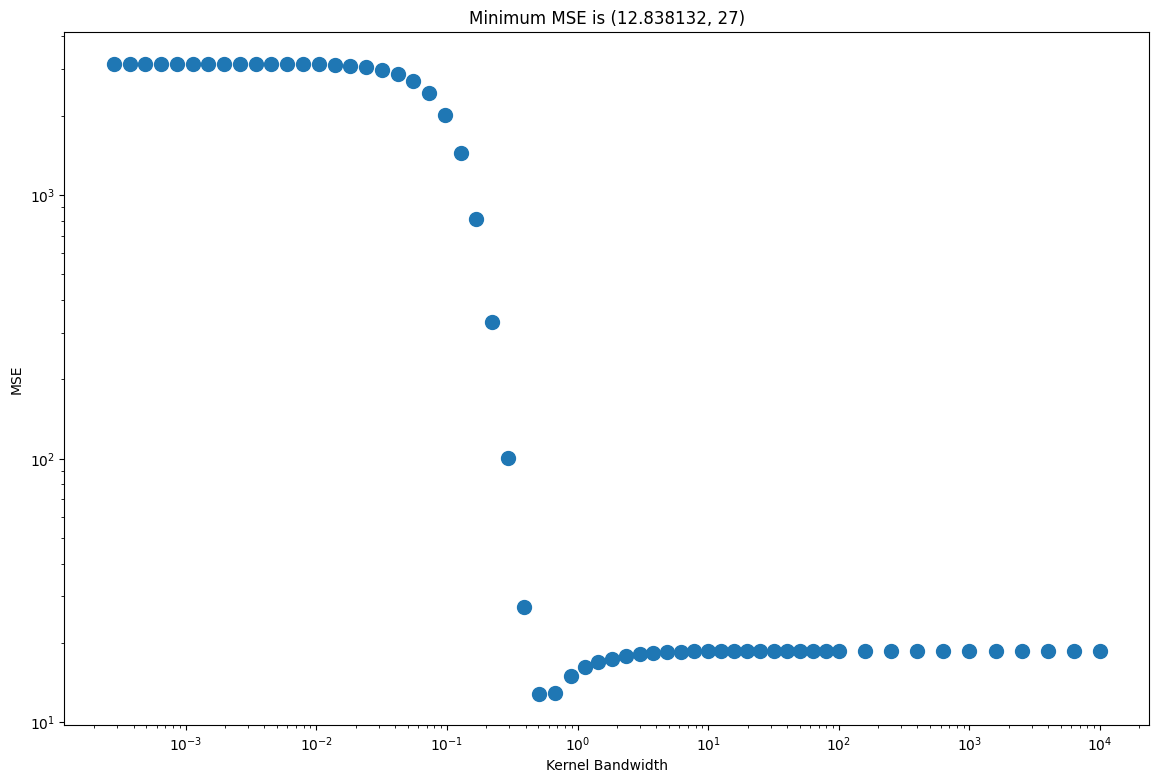

In [12]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")